# Rainfall EDA and Prediction (Arima & LSTM)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Libraries

# Linear algebra
import numpy as np
import math

# Data processing
import pandas as pd

# Data visualization(for EDA)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For lstm model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LSTM
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['figure.figsize']=10,6

# For Arima model
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Importing dataset

data = pd.read_csv('/content/CleanDataCapstone.csv', parse_dates=['Tanggal'],index_col=['Tanggal'])
data

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2012-01-01,24.0,28.2,24.4,92.0,0.8,0.3,3.0,315.0,1.0,NW
2012-01-02,23.0,29.2,25.4,88.0,4.9,0.2,4.8,251.9,1.0,NaN
2012-01-03,24.0,29.8,25.6,90.0,0.0,3.1,4.0,360.0,0.0,N
2012-01-04,22.0,32.6,26.4,82.0,1.1,4.2,3.0,315.0,1.0,NW
2012-01-05,23.0,31.6,24.8,89.0,0.0,4.3,4.8,251.9,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-13,22.5,31.6,25.7,88.0,5.2,6.5,8.0,170.0,1.0,C
2022-06-14,22.6,31.0,25.8,87.0,7.5,4.4,5.0,180.0,1.0,C
2022-06-15,22.3,30.2,25.2,90.0,14.3,4.0,3.0,360.0,1.0,C


In [ ]:
data.info()

NameError: ignored

In [ ]:
# Cek apakah ada data yang missing value
data.isnull().sum()

Tn          0
Tx          0
Tavg        0
RH_avg      0
RR          0
ss          0
ff_x        0
ddd_x       0
ff_avg      0
ddd_car    54
dtype: int64

In [ ]:
# Mengisi Missing values dengan value sebelumnya
data = data.ffill()
data

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2012-01-01,24.0,28.2,24.4,92.0,0.8,0.3,3.0,315.0,1.0,NW
2012-01-02,23.0,29.2,25.4,88.0,4.9,0.2,4.8,251.9,1.0,NW
2012-01-03,24.0,29.8,25.6,90.0,0.0,3.1,4.0,360.0,0.0,N
2012-01-04,22.0,32.6,26.4,82.0,1.1,4.2,3.0,315.0,1.0,NW
2012-01-05,23.0,31.6,24.8,89.0,0.0,4.3,4.8,251.9,1.0,NW
...,...,...,...,...,...,...,...,...,...,...
2022-06-13,22.5,31.6,25.7,88.0,5.2,6.5,8.0,170.0,1.0,C
2022-06-14,22.6,31.0,25.8,87.0,7.5,4.4,5.0,180.0,1.0,C
2022-06-15,22.3,30.2,25.2,90.0,14.3,4.0,3.0,360.0,1.0,C


In [ ]:
data.isnull().sum()

Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [ ]:
df_Rain = data[['RR']]
df_Rain.head()

,RR
Tanggal,
2012-01-01,0.8
2012-01-02,4.9
2012-01-03,0.0
2012-01-04,1.1
2012-01-05,0.0


In [ ]:
# Creating index column

df =  df_Rain.sort_index()
df1 = df.groupby(df.index.to_period('m')).head()
df1 = df.rename(columns = {'RR':'Rainfall'})
print(df1)

            Rainfall
Tanggal             
2012-01-01       0.8
2012-01-02       4.9
2012-01-03       0.0
2012-01-04       1.1
2012-01-05       0.0
...              ...
2022-06-15      14.3
2022-06-16       1.5
2022-06-16       1.5
2022-06-17      14.3
2022-06-17      14.3

[3821 rows x 1 columns]


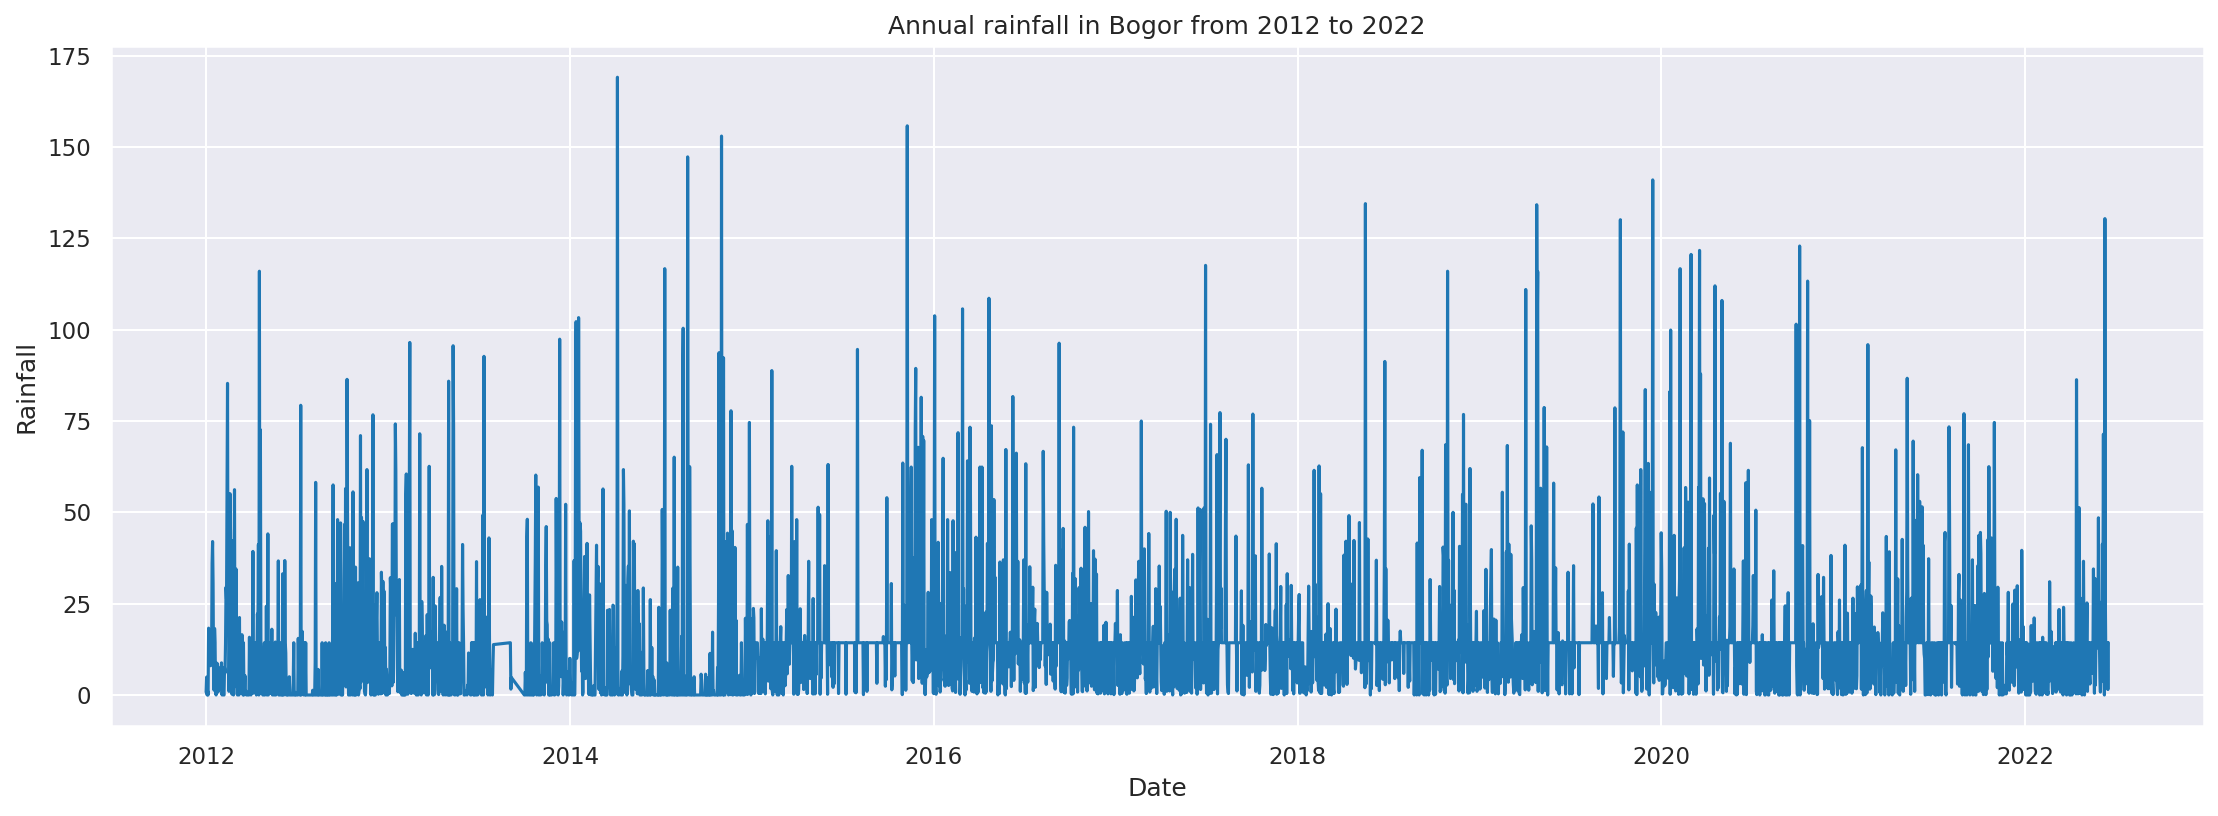

In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(18, 6), dpi=150)
plt.plot(df1.index, df1.Rainfall, color='tab:blue')
plt.gca().set(title='Annual rainfall in Bogor from 2012 to 2022',
xlabel='Date', ylabel='Rainfall')
plt.show()

In [ ]:
ax = df1.groupby([df1.index]).agg({'Rainfall':sum})
print('The largest amount of rain was recorded in the following years')
ax['Rainfall'].nlargest(5)

The largest amount of rain was recorded in the following years


Tanggal
2022-06-10    260.8
2014-04-06    169.1
2015-11-09    155.8
2014-11-01    153.0
2014-08-25    147.3
Name: Rainfall, dtype: float64

In [ ]:
# Get the raw data values from the pandas data frame
data_raw = df1.values.astype("float32")

# LSTM Model

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.00473093],
       [0.02897694],
       [0.        ],
       [0.00650503],
       [0.        ]], dtype=float32)

In [ ]:
# Using 80% of data for training, 40% for validation

TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (3056, 765)


In [ ]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
# Create test and training sets for one-step-ahead regression

window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(3054, 1)
New training data shape:
(3054, 1, 1)


In [ ]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()

    model.add(LSTM(2000, activation = 'tanh', recurrent_activation='sigmoid', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error",
                  optimizer = "adam")
    model.fit(train_X,
              train_Y,
              epochs = 10,
              batch_size = 64,
              )

    return(model)

In [ ]:
# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
48/48 [==============================] - 36s 617ms/step - loss: 0.0129
Epoch 2/10
48/48 [==============================] - 22s 466ms/step - loss: 0.0125
Epoch 3/10
48/48 [==============================] - 22s 465ms/step - loss: 0.0125
Epoch 4/10
48/48 [==============================] - 22s 465ms/step - loss: 0.0125
Epoch 5/10
48/48 [==============================] - 23s 483ms/step - loss: 0.0123
Epoch 6/10
48/48 [==============================] - 24s 501ms/step - loss: 0.0124
Epoch 7/10
48/48 [==============================] - 23s 483ms/step - loss: 0.0121
Epoch 8/10
48/48 [==============================] - 22s 463ms/step - loss: 0.0121
Epoch 9/10
48/48 [==============================] - 26s 546ms/step - loss: 0.0124
Epoch 10/10
48/48 [==============================] - 22s 462ms/step - loss: 0.0121


In [ ]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 18.31 RMSE
Test data score: 15.90 RMSE


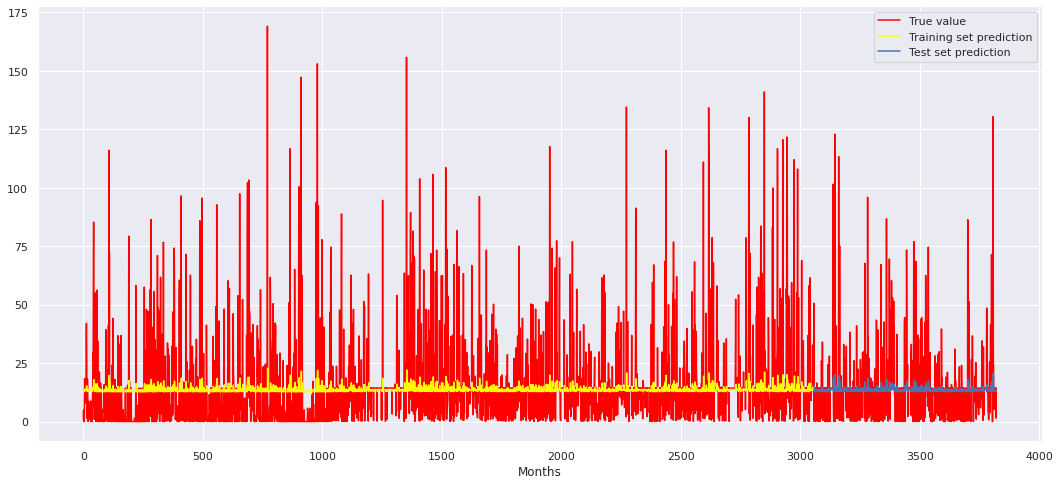

In [ ]:
# Start with training predictions

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [ ]:
test_predict

array([[15.8436   ],
       [12.854639 ],
       [12.800026 ],
       [13.660117 ],
       [13.212317 ],
       [12.860705 ],
       [13.206261 ],
       [13.660117 ],
       [12.793958 ],
       [13.660117 ],
       [13.660117 ],
       [12.866773 ],
       [13.4907875],
       [13.793072 ],
       [13.551278 ],
       [12.860705 ],
       [13.660117 ],
       [13.660117 ],
       [12.793958 ],
       [12.793958 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [12.793958 ],
       [12.793958 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [12.872839 ],
       [13.024456 ],
       [14.366273 ],
       [13.660117 ],
       [12.945628 ],
       [13.660117 ],
       [14.847804 ],
       [13.460535 ],
       [12.824302 ],
       [13.33949  ],
       [13.660117 ],
       [12.854639 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [13.660117 ],
       [12.793958 ],
       [13.66

In [ ]:
train_predict

array([[12.842504],
       [13.091136],
       [12.793958],
       ...,
       [14.769629],
       [13.660117],
       [13.660117]], dtype=float32)

# Arima Model

ARIMA models work on the following assumptions –

1. The data series is stationary, which means that the mean and variance should not vary with time.

2. The data provided as input must be a univariate series, since arima uses the past values to predict the future values.
To identify the nature of data, we will be using the null hypothesis.

Ho: It is non-stationary

H1: It is stationary We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

In [ ]:
test_result = adfuller(df1['Rainfall'])

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+ str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df1['Rainfall'])

ADF Test Statistic : -14.776911853496218
p-value : 2.2767368185669143e-27
#Lags Used : 10
Number of Observations : 3810
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
# Split into train and test sets

training_size = int(len(df1)*0.90)
test_size = len(df1) - training_size
train,valid = df1.iloc[0:training_size,:], df1.iloc[training_size:len(df),:1]
training = train['Rainfall']
validation = valid['Rainfall']

In [ ]:
model = auto_arima(training, start_p=0, start_q=0, max_p=3, max_q=3, m=12, start_P=0, start_Q=0, max_P=1, max_Q=1, seasonal=True, d=0, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=31780.268, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=30871.191, Time=5.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=31778.272, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=31773.010, Time=0.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.67 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=6.37 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=30887.836, Time=2.30 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=30868.847, Time=6.46 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=31770.177, Time=0.87 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.65 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=6.89 sec
 ARIMA(3,0,0)(1,1,0)[12] intercept   : AIC=30870.776, Time=8.65 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=30870.373, Time=11.71 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

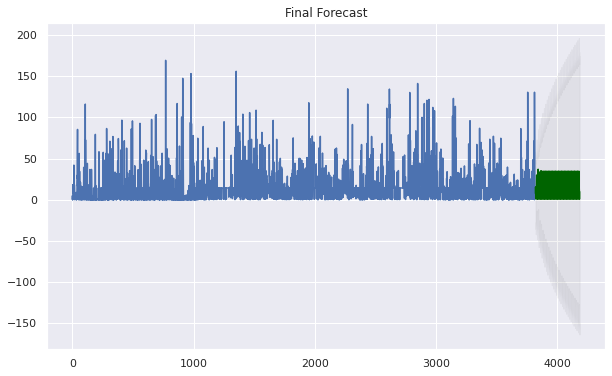

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = pd.read_csv('/content/CleanDataCapstone.csv')
df = pd.DataFrame()
df['Tanggal']=data['Tanggal']
df['RR']=data['RR']

# Forecast
n_periods = 365
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.RR), len(df.RR)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.RR)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.05)

plt.title("Final Forecast")
plt.show()

In [ ]:
fc_series.to_csv("365nextdays.csv",index=False)

In [ ]:
valid

,Rainfall
Tanggal,
2021-07-26,0.0
2021-07-27,14.3
2021-07-28,14.3
2021-07-29,14.3
2021-07-30,14.3
...,...
2022-06-15,14.3
2022-06-16,1.5
2022-06-16,1.5


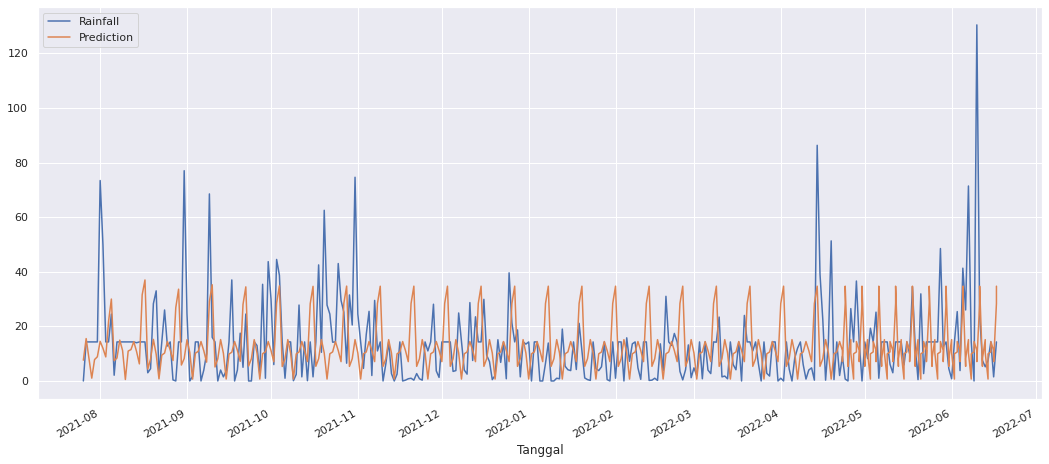

In [ ]:
future_forecast = model.predict(len(valid))
future_forecast = pd.DataFrame(future_forecast, index = valid.index, columns=['Prediction'])
pd.concat([valid, future_forecast], axis=1).plot(figsize = (18, 8))

In [ ]:
# Submission

df1.to_csv('df_rainfall.csv', index=True)